In [16]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
import functions as fs
from time import time

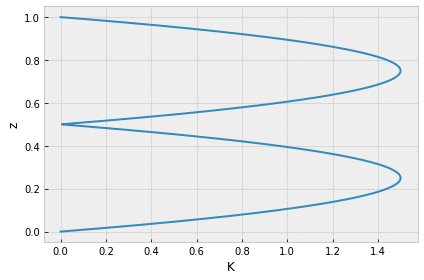

In [17]:
#Part 1  plot the diffusivity profile
z=np.linspace(0,1,1000)
k=fs.K(z)

fig=plt.figure(6)
plt.plot(k,z)
plt.xlabel("K")
plt.ylabel("z")
plt.tight_layout()
del z,k

## Comparing four schemes

In [26]:
#Part 2 calculate Pmap
#Initialize variable

#sink velocity
w=0
#simulation time
Tmax=1      
#time step
dt=1e-4
#number of discrte time
Ntime=int(Tmax/dt)
#number of particles
Np=4000
#initial the postion array of all particle
z_e=np.zeros((Np,)) 
#Assign initial condition
z_e=np.full((Np,),0.75)
#copy initialized postion array to Milstein scheme
z_m=z_e.copy()
#copy initialized postion array to Milstein scheme
z_v=z_e.copy()
#copy initialized postion array to Milstein 2nd scheme
z_m2=z_e.copy()
#Set gap to 1 if you want histogram to recorde all the timestep.
Gap=4          
#Number of bins in the instogram
Nbins=200
#timer the performance of the whole program
start_time = time()
#print the Ntime
print("Ntime:  ", Ntime,"\n")
#create histogram
hist_E= np.zeros((1,Nbins-1))
hist_M= np.zeros((1,Nbins-1))
hist_V= np.zeros((1,Nbins-1))
hist_M2=np.zeros((1,Nbins-1))

#Running
###############
timeEuler=time()
print("Working with Euler Maruyama scheme")
for i in range(Ntime-1):
    z_e=fs.step_e (z_e,w,dt,Np)
    if ( i % Gap ==0):
        temp, _ = np.histogram(z_e, bins = np.linspace(0, 1, Nbins))
        temp=temp.reshape(1,Nbins-1)
        hist_E=np.concatenate((hist_E,temp), axis=0)
timeEuler=time()-timeEuler
print("TimeEuler: ", timeEuler,"\n")
###############
timeVisser=time()
print("Working with Visser scheme")
for i in range(Ntime-1):
    z_v=fs.step_v (z_v,w,dt,Np)
    if ( i % Gap ==0):
        temp, _ = np.histogram(z_v, bins = np.linspace(0, 1, Nbins))
        temp=temp.reshape(1,Nbins-1)
        hist_V=np.concatenate((hist_V,temp), axis=0)
timeVisser=time()-timeVisser
print("TimeVisser: ", timeVisser,"\n")
###############
timeMilstein=time()        
print("Working with Misltein 1st scheme")
for i in range(Ntime-1):
    z_m=fs.step_m (z_m,w,dt,Np)
    if ( i % Gap ==0):
        temp, _ = np.histogram(z_m, bins = np.linspace(0, 1, Nbins))
        temp=temp.reshape(1,Nbins-1)
        hist_M=np.concatenate((hist_M,temp), axis=0)
timeMilstein=time()-timeMilstein
print("TimeMilstein: ", timeMilstein,"\n")
###############
timeMilstein2=time()
print("Working with Milstein 2nd scheme")
for i in range(Ntime-1):
    z_m2=fs.step_m2(z_m2,w,dt,Np)
    if ( i % Gap ==0):    
        temp, _ = np.histogram(z_m2, bins = np.linspace(0, 1, Nbins))
        temp=temp.reshape(1,Nbins-1)
        hist_M2=np.concatenate((hist_M2,temp), axis=0)  
timeMilstein2=time()-timeMilstein2
print("TimeMilstein2: ", timeMilstein2,"\n")
###############
print("Time used: ", time()-start_time, "\n")
print("Done with calculation. you can enter the plotting section.")

Ntime:   10000 

Working with Euler Maruyama scheme
TimeEuler:  5.345390319824219 

Working with Visser scheme
TimeVisser:  4.701983451843262 

Working with Misltein 1st scheme
TimeMilstein:  4.487812519073486 

Working with Milstein 2nd scheme
TimeMilstein2:  8.03668737411499 

Time used:  22.5731303691864 

Done with calculation. you can enter the plotting section.


Plotting color map.


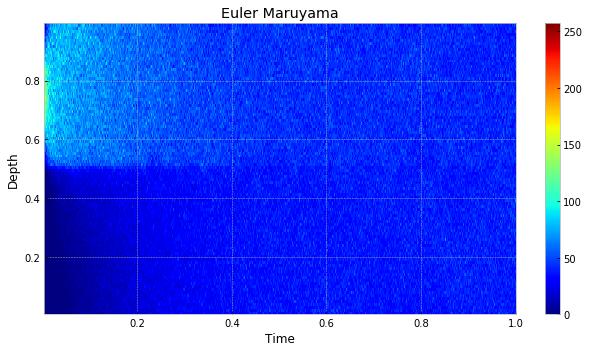

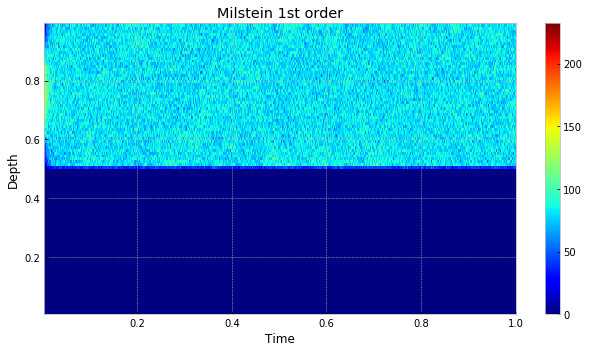

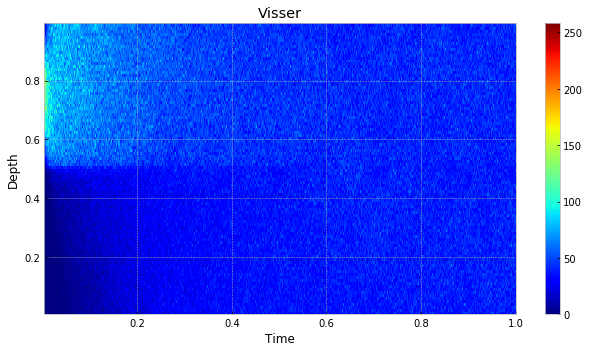

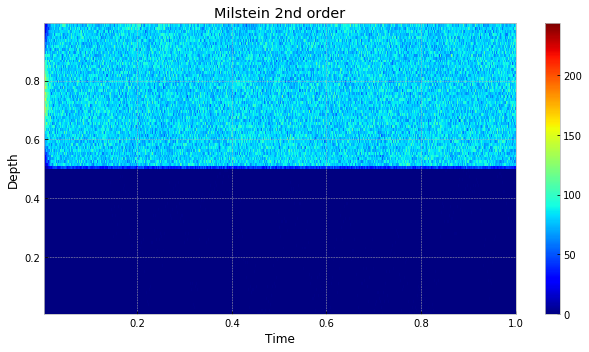

In [25]:
print("Plotting color map.")
#create number of position point that depends on number of bins
bins = np.linspace(0, 1, Nbins)
#right shift the position points
midpoints = bins[:-1]+(bins[1]-bins[0])/2
#create discrete time frame base on histogram. 
#"Please remember that we did not record every single time step og the simulation"
times = np.linspace(0, Tmax, hist_E.shape[0])

#Transpose these vector to use pcoloermesh from mathplotlib
hist_E= hist_E.T
hist_M= hist_M.T
hist_V= hist_V.T
hist_M2=hist_M2.T

#How many frame you want skip at beginning. We do this to show better contrast. 
frameSkip=5         

#plt.figure(1)
fig=plt.figure(1, figsize = (9,5))
ax=plt.gca()
cmap=ax.pcolormesh(times[frameSkip:], midpoints, hist_E[:,frameSkip:], cmap='jet')
fig.colorbar(cmap)
plt.xlabel("Time")
plt.ylabel("Depth")
plt.title("Euler Maruyama")
plt.tight_layout()
plt.grid(True)
fil="../Figures/Euler_dt=%2.1e.png"%dt
plt.savefig(fil)

#plt.figure(2)
fig=plt.figure(2, figsize = (9,5))
ax=plt.gca()
cmap=ax.pcolormesh(times[frameSkip:], midpoints, hist_M[:,frameSkip:], cmap='jet')
fig.colorbar(cmap)
plt.xlabel("Time")
plt.ylabel("Depth")
plt.title("Milstein 1st order")
plt.tight_layout()
plt.grid(True)
fil="../Figures/Milstein_dt=%2.1e.png"%dt
plt.savefig(fil)

#plt.figure(3)
fig=plt.figure(3, figsize = (9,5))
ax=plt.gca()
cmap=ax.pcolormesh(times[frameSkip:], midpoints, hist_V[:,frameSkip:], cmap='jet')
fig.colorbar(cmap)
plt.xlabel("Time")
plt.ylabel("Depth")
plt.title("Visser")
plt.tight_layout()
plt.grid(True)
fil="../Figures/Visse_dt=%2.1e.png"%dt
plt.savefig(fil)

#plt.figure(4)
fig=plt.figure(4, figsize = (9,5))
ax=plt.gca()
cmap=ax.pcolormesh(times[frameSkip:], midpoints, hist_M2[:,frameSkip:], cmap='jet')
fig.colorbar(cmap)
plt.xlabel("Time")
plt.ylabel("Depth")
plt.title("Milstein 2nd order")
plt.tight_layout()
plt.grid(True)
fil="../Figures/Milstein2_dt=%2.1e.png"%dt
plt.savefig(fil)



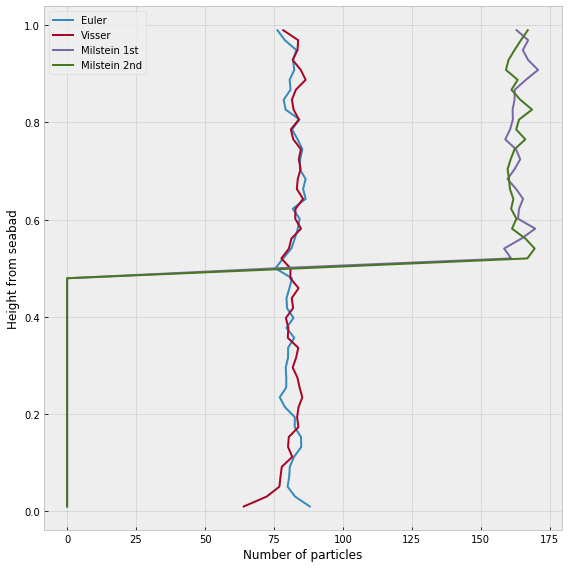

In [22]:
fig=plt.figure(5,figsize=(8,8))
plt.plot(np.mean(hist_E[:, -50:],axis=1), midpoints, label= "Euler")
plt.plot(np.mean(hist_V[:, -50:],axis=1), midpoints, label= "Visser")
plt.plot(np.mean(hist_M[:, -50:],axis=1), midpoints, label= "Milstein 1st")
plt.plot(np.mean(hist_M2[:, -50:],axis=1), midpoints,label= "Milstein 2nd")
plt.xlabel("Number of particles")
plt.ylabel("Height from seabad")
#plt.title("I don't know how to name it")
plt.tight_layout()
plt.legend()

plt.show()

## Anormaly boundary condition

Here we just change the $\Delta t=1e-4$, Tmax$=5$ and bins$=1000$



Ntime:   5000 

Working with Euler Maruyama scheme
TimeEuler:  3.3615825176239014 

Working with Visser scheme
TimeVisser:  3.403616428375244 

Working with Misltein 1st scheme
TimeMilstein:  3.3190419673919678 

Working with Milstein 2nd scheme
TimeMilstein2:  5.239271879196167 

Time used:  15.324509620666504 

Something strange happening at the boundary


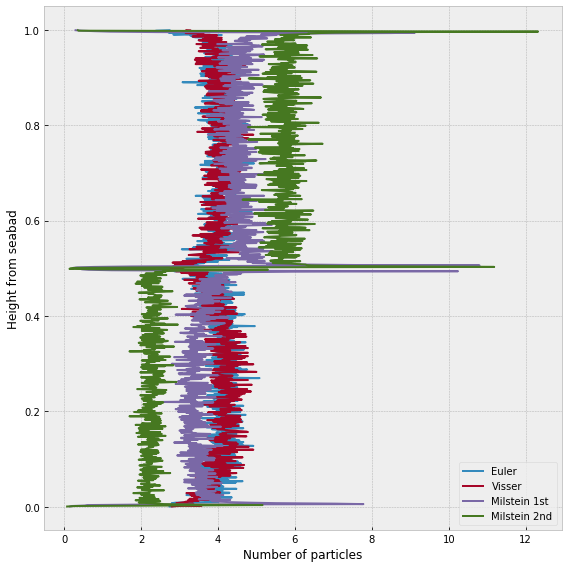

In [32]:
#Part 2 calculate Pmap
#Initialize variable

#sink velocity
w=0
#simulation time
Tmax=5      
#time step
dt=1e-3
#number of discrte time
Ntime=int(Tmax/dt)
#number of particles
Np=4000
#initial the postion array of all particle
z_e=np.zeros((Np,)) 
#Assign initial condition
z_e=np.full((Np,),0.75)
#copy initialized postion array to Milstein scheme
z_m=z_e.copy()
#copy initialized postion array to Milstein scheme
z_v=z_e.copy()
#copy initialized postion array to Milstein 2nd scheme
z_m2=z_e.copy()
#Set gap to 1 if you want histogram to recorde all the timestep.
Gap=4          
#Number of bins in the instogram
Nbins=1000
#timer the performance of the whole program
start_time = time()
#print the Ntime
print("Ntime:  ", Ntime,"\n")
#create histogram
hist_E= np.zeros((1,Nbins-1))
hist_M= np.zeros((1,Nbins-1))
hist_V= np.zeros((1,Nbins-1))
hist_M2=np.zeros((1,Nbins-1))

#Running
###############
timeEuler=time()
print("Working with Euler Maruyama scheme")
for i in range(Ntime-1):
    z_e=fs.step_e (z_e,w,dt,Np)
    if ( i % Gap ==0):
        temp, _ = np.histogram(z_e, bins = np.linspace(0, 1, Nbins))
        temp=temp.reshape(1,Nbins-1)
        hist_E=np.concatenate((hist_E,temp), axis=0)
timeEuler=time()-timeEuler
print("TimeEuler: ", timeEuler,"\n")
###############
timeVisser=time()
print("Working with Visser scheme")
for i in range(Ntime-1):
    z_v=fs.step_v (z_v,w,dt,Np)
    if ( i % Gap ==0):
        temp, _ = np.histogram(z_v, bins = np.linspace(0, 1, Nbins))
        temp=temp.reshape(1,Nbins-1)
        hist_V=np.concatenate((hist_V,temp), axis=0)
timeVisser=time()-timeVisser
print("TimeVisser: ", timeVisser,"\n")
###############
timeMilstein=time()        
print("Working with Misltein 1st scheme")
for i in range(Ntime-1):
    z_m=fs.step_m (z_m,w,dt,Np)
    if ( i % Gap ==0):
        temp, _ = np.histogram(z_m, bins = np.linspace(0, 1, Nbins))
        temp=temp.reshape(1,Nbins-1)
        hist_M=np.concatenate((hist_M,temp), axis=0)
timeMilstein=time()-timeMilstein
print("TimeMilstein: ", timeMilstein,"\n")
###############
timeMilstein2=time()
print("Working with Milstein 2nd scheme")
for i in range(Ntime-1):
    z_m2=fs.step_m2(z_m2,w,dt,Np)
    if ( i % Gap ==0):    
        temp, _ = np.histogram(z_m2, bins = np.linspace(0, 1, Nbins))
        temp=temp.reshape(1,Nbins-1)
        hist_M2=np.concatenate((hist_M2,temp), axis=0)  
timeMilstein2=time()-timeMilstein2
print("TimeMilstein2: ", timeMilstein2,"\n")
###############
print("Time used: ", time()-start_time, "\n")

#create number of position point that depends on number of bins
bins = np.linspace(0, 1, Nbins)
#right shift the position points
midpoints = bins[:-1]+(bins[1]-bins[0])/2
#create discrete time frame base on histogram. 
#"Please remember that we did not record every single time step og the simulation"
times = np.linspace(0, Tmax, hist_E.shape[0])

#Transpose these vector to use pcoloermesh from mathplotlib
hist_E= hist_E.T
hist_M= hist_M.T
hist_V= hist_V.T
hist_M2=hist_M2.T

#How many frame you want skip at beginning. We do this to show better contrast. 
frameSkip=5

fig=plt.figure(5,figsize=(8,8))
plt.plot(np.mean(hist_E[:, -50:],axis=1), midpoints, label= "Euler")
plt.plot(np.mean(hist_V[:, -50:],axis=1), midpoints, label= "Visser")
plt.plot(np.mean(hist_M[:, -50:],axis=1), midpoints, label= "Milstein 1st")
plt.plot(np.mean(hist_M2[:, -50:],axis=1), midpoints,label= "Milstein 2nd")
plt.xlabel("Number of particles")
plt.ylabel("Height from seabad")
#plt.title("I don't know how to name it")
plt.tight_layout()
plt.legend()

print("Something strange happening at the boundary")